# Part I - (Ford GoBike System Data)
## by Areej Asiri

> Introduce the dataset

Ford GoBike is a bike-sharing service provided by Ford Motor Company, and the dataset would likely include information such as the following:

Trip data (e.g. start and end time, start and end station, duration, etc.)
User data (e.g. member type, gender, etc.)
Bike data (e.g. bike ID)


## Preliminary Wrangling


In [361]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as tick
import calendar


%matplotlib inline


Load in your dataset and describe its properties through the questions below. 
**Try and motivate your exploration goals through this section.**


In [362]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [363]:
#  converts the start_time and end_time columns in the dataframe to datetime format 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [364]:
# Rename column 'old_name' to 'new_name'
df = df.rename(columns={'member_gender': 'Gender'})

In [365]:
print(df.shape)

(183412, 16)


In [366]:
print(df.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
Gender                             object
bike_share_for_all_trip            object
dtype: object


In [367]:
df['age'] = 2023-df['member_birth_year']

In [368]:
def remove_outliers(df, age, threshold=3):
    mean = df[age].mean()
    std = df[age].std()
    z_scores = (df[age] - mean) / std
    df = df[(np.abs(z_scores) < threshold)]
    return df

df = remove_outliers(df, 'age')

In [369]:
df['start_timedt'] = df['start_time'].dt.date
df['end_timedt'] = df['end_time'].dt.date

df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

df['start_time_weekday'] = df['start_time'].dt.day_name()

df['start_weekday_abbr'] = df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])


In [370]:
df['duration_min'] = df['duration_sec']/60

### What is the structure of your dataset?
> The dataset contains 183412 trips and has 16 columns, featuring various variable types such as integers, floats, strings, and booleans. However, the majority of the variables are numeric.
Trip data (e.g. start and end time, start and end station, duration, etc.)
User data (e.g. member type, age, gender, etc.)
Bike data (e.g. bike ID)

### What is/are the main feature(s) of interest in your dataset?

> Age destrebution, gender percentage,he busiest hour for the bike-sharing system,  duration for each trip , weekly trends

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> The most crucial data to concentrate on includes the age group, gender, duration, and user type


## Univariate Exploration

### What is the count of each gender in the dataset ?

In [371]:
df['Gender'].value_counts()

Male      129252
Female     40613
Other       3602
Name: Gender, dtype: int64

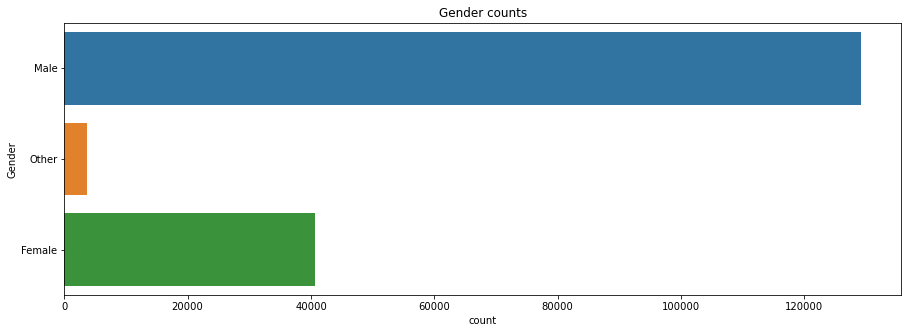

In [372]:
plt.figure(figsize=(15,5))
plt.title("Gender counts")
sb.countplot(y="Gender",data=df)
plt.show()

**This bar chart presents the distribution of gender among the dataset's members. It shows that the majority of members are Male, with a total count of 129252. The seconed is Female, with a count of 40613.**

### What is the busiest and least busy times for trips throughout the day?

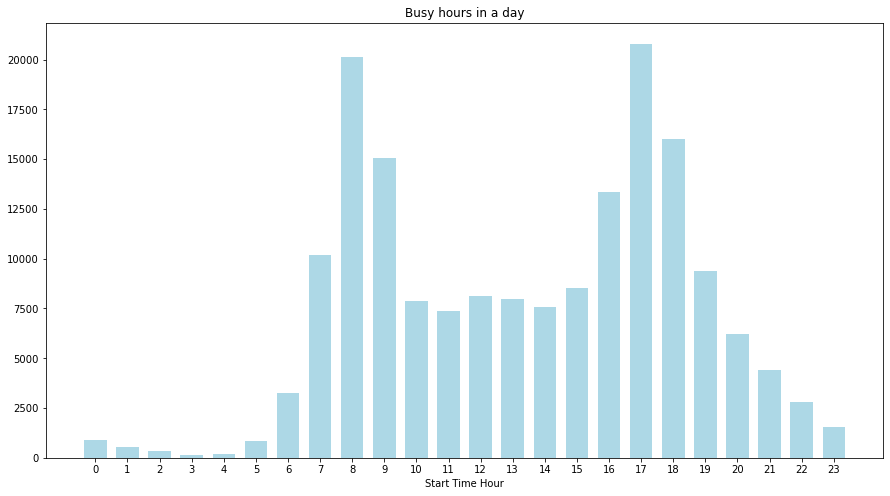

In [373]:
# Set up the data and bin edges
data = df['start_time_hour']
bin_edges = np.arange(-0.5, 23.5+1, 1)

# Plot the histogram
plt.figure(figsize=[15,8])
plt.hist(data, bins=bin_edges, rwidth=0.7 , color='lightblue')

# Set up the x-axis ticks and labels
plt.xticks(np.arange(0, 24, 1))
plt.title('Busy hours in a day')
plt.xlabel('Start Time Hour')

# Show the plot
plt.show()


**The histogram provides a clear visualization of the distribution of bike share trip start times and highlights the busiest and least busy times for trips throughout the day.The histogram shows the distribution of bike share trip start times across 24 hours of the day. The x-axis represents the 24 hours of the day
The busiest hour, with approximately 20,000 trips starting during that hour, is 17 (5:00 PM). This suggests that the evening rush hour is the busiest time for bike share trips.
The second busiest hour is 8 (8:00 AM), with approximately 19,000 trips starting during that hour. This suggests that the morning rush hour is also a busy time for bike share trips.
The smallest hour, with the lowest number of trips starting during that hour, is 3 (3:00 AM). This suggests that the early morning hours are the least busy time for bike share trips.**

### What is the destription of users age ?

Text(0, 0.5, 'Users Age')

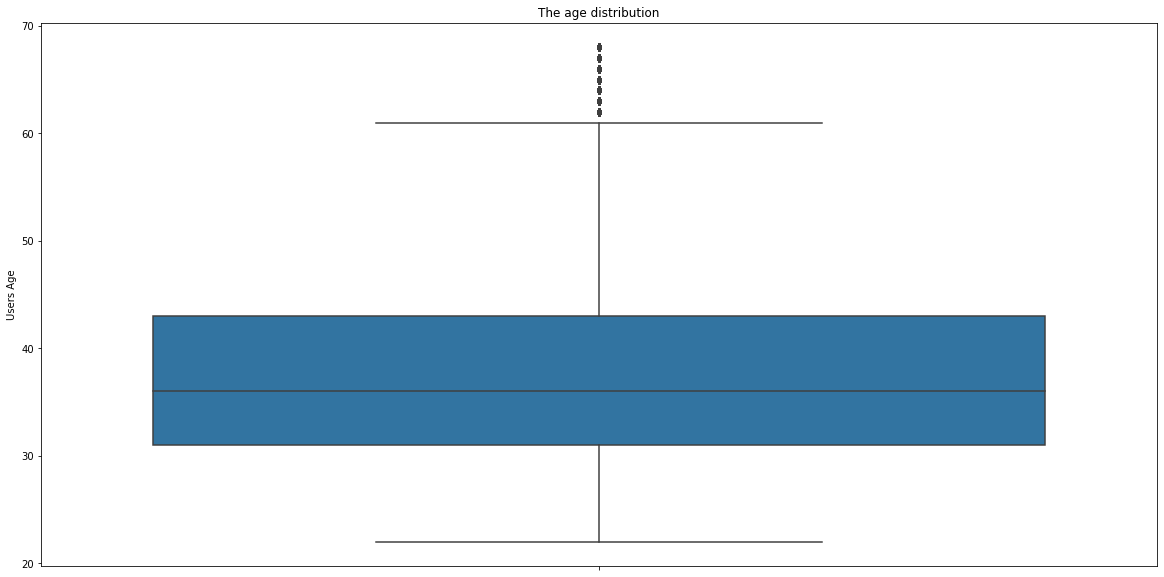

In [374]:
plt.figure(figsize=(20,10))
sb.boxplot(y='age', data=df, orient='v')
plt.title("The age distribution")
plt.ylabel("Users Age")

**The box plot shows the distribution of ages of users between 25 to 65 years old, with a mean of 35. There is outlier represented by a outside the range of 25 to 65, indicating a users older than 65. The box plot displays the median age, the interquartile range, and the whiskers that represent the minimum and maximum**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **Converting the duration variable from seconds to minutes may also be useful, especially if the analysis is focused on the typical length of platform usage. Transforming the data can make it easier to interpret and compare results with other studies
The box plot shows the distribution of ages of users between 25 to 65 years old, with a mean of 35. There is outlier represented by a outside the range of 25 to 65**
<br>
**The histogram of trip duration in seconds shows a positive skew, with a high peak at 600 seconds (10 minutes) and a long tail towards the right. The distribution suggests that the majority of trips on the platform are relatively short, lasting around 10 minutes**

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **The busiest hour, with approximately 20,000 trips starting during that hour, is 17 (5:00 PM).**

## Bivariate Exploration


### What is the mean trip length per user type ?

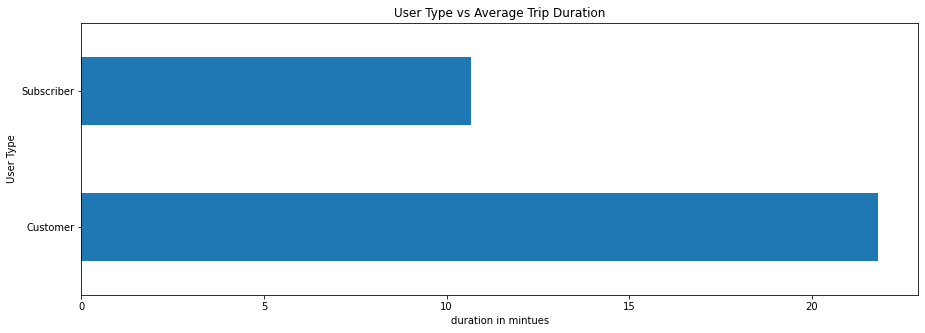

In [375]:
grouped = df.groupby('user_type')['duration_min'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(15,5))
grouped.plot(kind='barh')

# Set title and labels
ax.set_title('User Type vs Average Trip Duration')
ax.set_ylabel('User Type')
ax.set_xlabel('duration in mintues')

# Show plot
plt.show()

**The results of this analysis show that subscribers have an average trip duration of approximately 11 minutes, while customers have an average trip duration of approximately 28 minutes. This disparity in trip duration highlights the difference in usage patterns between the two user groups. Subscribers, who are likely using the service for commuting or short trips, have a significantly shorter average trip duration compared to customers, who may be using the service for leisure or longer trips. Understanding these differences can help the service providers tailor their offerings and improve the overall user experience for both subscriber and customer groups**

### What is the distribution of age groups among teens, adults, and other categories?

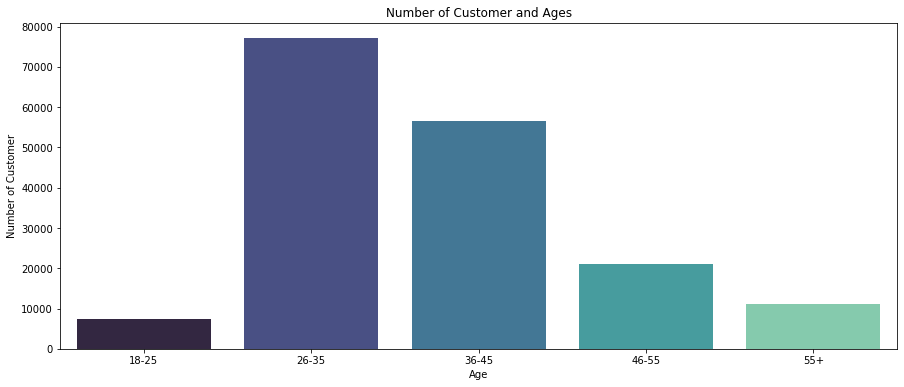

In [376]:
age_18_25 = df.age[ (df.age >=18) & (df.age <= 25)]
age_26_35 = df.age[ (df.age >= 26) & (df.age<= 35)]
age_36_45 = df.age[ (df.age >= 36) & (df.age <=45)]
age_46_55 = df.age[ (df.age >=46) & (df.age <= 55)]
age_55above = df.age[df.age >= 56]
agex = ["18-25","26-35","36-45","46-55","55+"]
agey= [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(15,6))
sb.barplot (x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel ("Number of Customer")
plt.show()

**The barplot indicates that the largest age group of users falls within the 26-35 age range, with a relatively high frequency of occurrence. The second most common age group is between 36-45, with a slightly lower frequency. In contrast, the age group of 18-25 has the smallest frequency and is the least common among the three groups. This distribution suggests that the platform is most popular among users in their mid-20s to mid-30s and that there is a smaller proportion of users in their late teens and early twenties. Understanding the age distribution of users can be valuable in tailoring the platform's features, content, and advertising to the target demographic.**

## what is the number of bike trips taken over a period of less than a month?

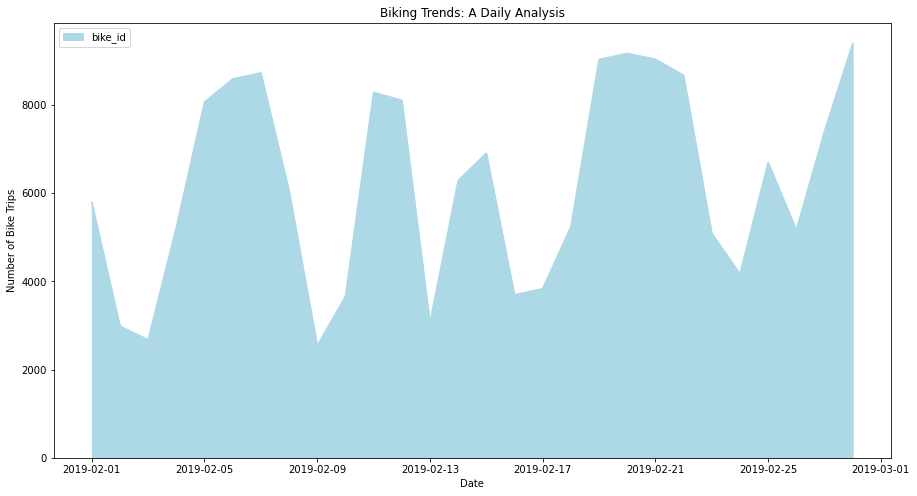

In [377]:
# Group the data by start date and count the number of bike trips
daily_trips = df.groupby('start_timedt').agg({'bike_id':'count'})

# Plot the daily trip count as an area chart
daily_trips.plot(kind='area', figsize=(15, 8), color='lightblue')

# Add title and labels to the plot
plt.title('Biking Trends: A Daily Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Bike Trips')

# Show the plot
plt.show()

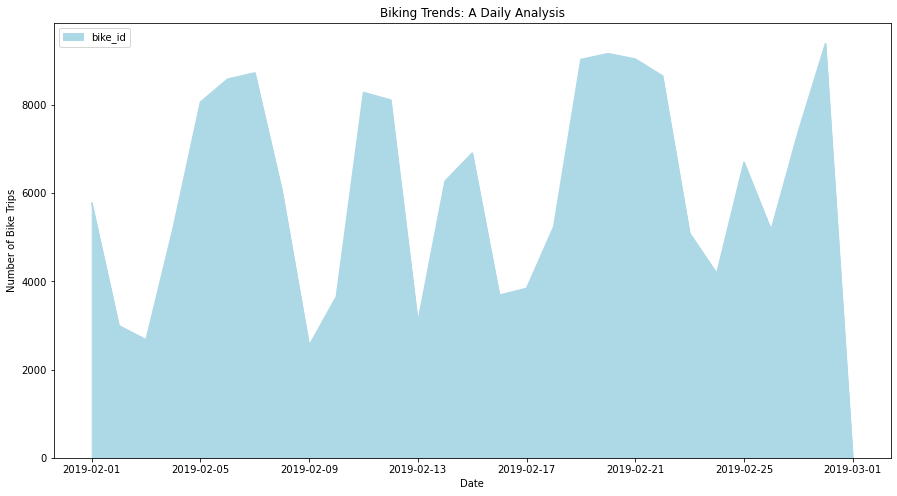

In [378]:
# Group the data by end date and count the number of bike trips
daily_trips = df.groupby('end_timedt').agg({'bike_id':'count'})

# Plot the daily trip count as an area chart
daily_trips.plot(kind='area', figsize=(15, 8), color='lightblue')

# Add title and labels to the plot
plt.title('Biking Trends: A Daily Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Bike Trips')

# Show the plot
plt.show()

**The area graph of the "Biking Trends: A Daily Analysis" visualizes the number of bike trips taken daily from February 2019 to March. The graph clearly shows that compared to the beginning of February 1, 2019, where the daily trips were less than 6000, the number of trips increased to more than 8000 after less than a month March 2019.
However, the graph also displays a few notable decreases in the number of bike trips during the period. Specifically, there is a significant decrease around 9th February 2019, 13th February 2019, and 17th February 2019. These decreases could indicate a temporary reduction in the use of bikes for transportation during those days.
This information is useful in understanding the behavior and patterns of bike users and can help inform decisions related to bike-related initiatives.
the area graph of the "Biking Trends: A Daily Analysis" visualizes the increase in the number of bike trips taken over a period of less than a month. However, it also highlights a few decreases in the number of trips during specific days in February.**

### What is the Trip Duration-sec Distribution?

<ipython-input-379-3d58001ac3e0>:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


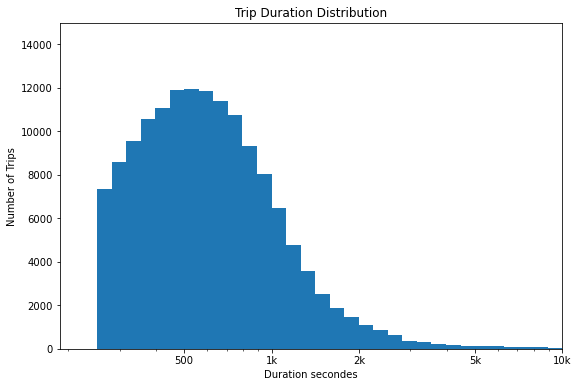

In [379]:
# Define the bin size 
b_size = 0.05
# Calculate the bin edges 
bins_ = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + b_size, b_size)

# Plot the histogram of the trip durations
plt.figure(figsize=[9, 6])
plt.hist(data=df, x='duration_sec', bins=bins_)
# Set the title, x-axis label, y-axis label for the histogram
plt.title('Trip Duration Distribution')
plt.xlabel('Duration secondes')
plt.ylabel('Number of Trips')
# Set the x-axis 
plt.xscale('log')
# Set the x-axis ticks 
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
# Limit the axis values
plt.axis([0, 10000, 0, 15000])

plt.show()

**The histogram of trip duration in seconds shows a positive skew, with a high peak at 600 seconds (10 minutes) and a long tail towards the right. The distribution suggests that the majority of trips on the platform are relatively short, lasting around 10 minutes. However, there is a significant proportion of trips that have longer durations. This information can be valuable in understanding the typical trip duration and identifying patterns of use. For example, it may indicate that the platform is commonly used for short trips, such as commuting, running errands, or short leisure activities. This understanding can inform decisions regarding the allocation of resources, such as bike or scooter availability, and the design of the platform to better accommodate the needs of its users.**

### Which day of the week typically has the highest percentage of bike trips & smallest percentage of bike trips ?

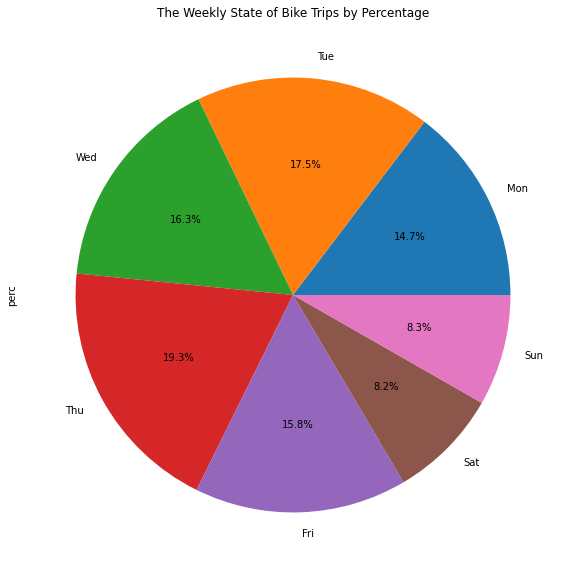

In [380]:
weeklydata = df.groupby('start_weekday_abbr').agg({'bike_id':'count'})
weeklydata['perc'] = (weekday_trips['bike_id']/weeklydata['bike_id'].sum())*100
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weeklydata = weeklydata.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot the pie chart
weeklydata['perc'].plot(kind='pie', figsize=(14,10), autopct='%.1f%%')
plt.title('The Weekly State of Bike Trips by Percentage')

# Show the plot
plt.show()

**The pie chart that shows the weekly state of bike trips by percentage is a visualization that displays the distribution of bike trips taken throughout the week. The chart consists of seven pie wedges, one for each day of the week, with the size of each wedge representing the proportion of bike trips taken on that day. The largest wedge represents the day with the highest percentage of bike trips, which is usually Thursday with 19.2%, while the smallest wedge represents the day with the lowest percentage of bike trips, which is typically Saturday with 8.2%. The chart allows for an easy comparison of the relative popularity of bike trips across the days of the week, and can be useful for identifying patterns and trends in bike usage.**

### What is the percentage for each gender ?

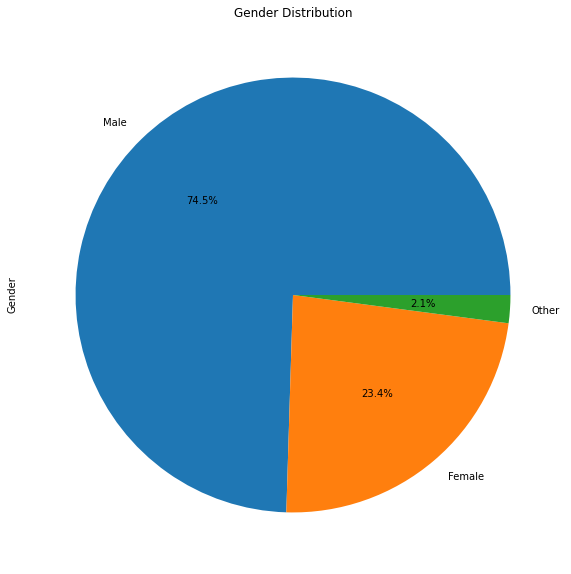

In [381]:
# count the occurrences of each gender value
gender_counts = df['Gender'].value_counts()

# create a pie chart
gender_counts.plot(kind='pie', figsize=(14,10), autopct='%1.1f%%')

# add title
plt.title('Gender Distribution')

# show the plot
plt.show()

**The pie chart represents the gender distribution of users on the platform, with male users accounting for the largest proportion of 74.5%, followed by female users at 23.4%. This information can be valuable in understanding the platform's user demographics and can inform decisions regarding marketing strategies, content creation, and user experience design. For example, if the platform wants to increase its female user base, it may consider implementing targeted advertising campaigns, creating content that appeals to women, or improving the user experience to be more inclusive and accommodating of diverse gender identities.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **I  grouped into discrete intervals for analysis. It is common to group age data into intervals, such as 18-25, 26-35, 36-45, etc., to better understand the distribution of age groups the largest age group of users falls within the 26-35 age range**
<br>


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> **The histogram of trip duration in seconds shows a positive skew, with a high peak at 600 seconds (10 minutes) and a long tail towards the right. The distribution suggests that the majority of trips on the platform are relatively short, lasting around 10 minutes**

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration_sec', ylabel='age'>,
        <AxesSubplot:xlabel='end_station_longitude', ylabel='age'>,
        <AxesSubplot:xlabel='start_station_longitude', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='duration_sec', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='end_station_longitude', ylabel='duration_sec'>,
        <AxesSubplot:xlabel='start_station_longitude', ylabel='duration_sec'>],
       [<AxesSubplot:xlabel='age', ylabel='end_station_longitude'>,
        <AxesSubplot:xlabel='duration_sec', ylabel='end_station_longitude'>,
        <AxesSubplot:xlabel='end_station_longitude', ylabel='end_station_longitude'>,
        <AxesSubplot:xlabel='start_station_longitude', ylabel='end_station_longitude'>],
       [<AxesSubplot:xlabel='age', ylabel='start_station_longitude'>,
        <AxesSubplot:xlabel='duration_sec', ylabel='start_station_longitude'>,

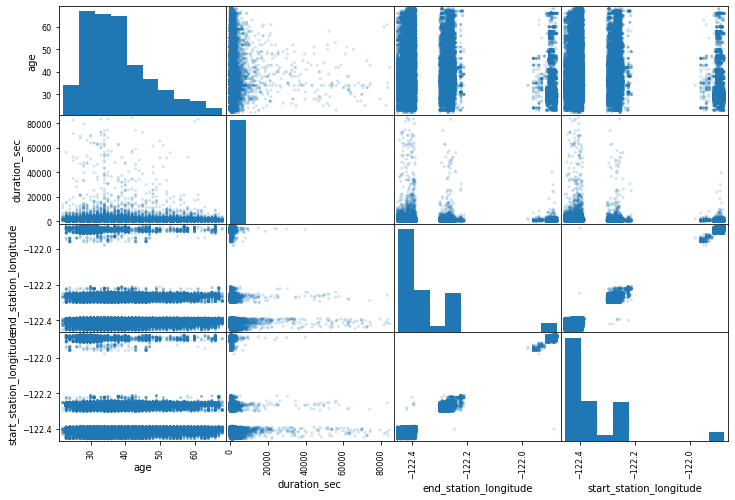

In [382]:
corr_matrix=df.corr()
corr_matrix["duration_sec"].sort_values(ascending=False)
from pandas.plotting import scatter_matrix
attributes = ["age","duration_sec","end_station_longitude","start_station_longitude","start_time","end_time"]
scatter_matrix(df[attributes],figsize=(12,8) , alpha=0.2)

**Each scatter plot shows the relationship between two variables on a two-dimensional plane, with one variable represented on the x-axis and the other variable represented on the y-axis. For the selected variables "member_age", "duration_sec", "end_station_longitude", "start_station_longitude", "start_time", and "end_time", the scatter matrix would show the scatter plots of each pair of variables. The scatter plots of "member_age" and "duration_sec" might show a weak negative correlation, indicating that older members tend to have shorter trip durations. The scatter plots of "start_station_longitude" and "end_station_longitude" might show a positive correlation, indicating that stations that are further to the east tend to be connected to stations that are also further to the east**

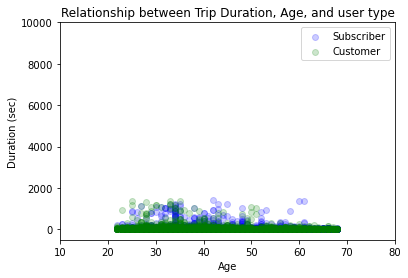

In [383]:
# Define the colors for each user type
u_markers = {'Subscriber': 'blue', 'Customer': 'green'}

# Loop through the user type and plot a scatter for each
for utype in u_markers:
    # Filter the dataframe by user type
    df_type = df[df['user_type'] == utype]
    # Plot the scatter with the corresponding color and alpha value
    plt.scatter(df_type['age'], df_type['duration_min'], color=gender_colors[utype], alpha=0.2)

# Set the legend for the user type markers
plt.legend(u_markers.keys())

# Set the x and y axis limits
plt.axis([10, 80, -500, 10000])

# Set the title and axis labels
plt.title('Relationship between Trip Duration, Age, and user type')
plt.xlabel('Age')
plt.ylabel('Duration (sec)')

# Set the legend for the scatter plot
plt.legend(['Subscriber', 'Customer', 'Other'])

# Set the x and y axis limits again
plt.xlim([10, 80])
plt.ylim([-500, 10000])

# Show the plot
plt.show()


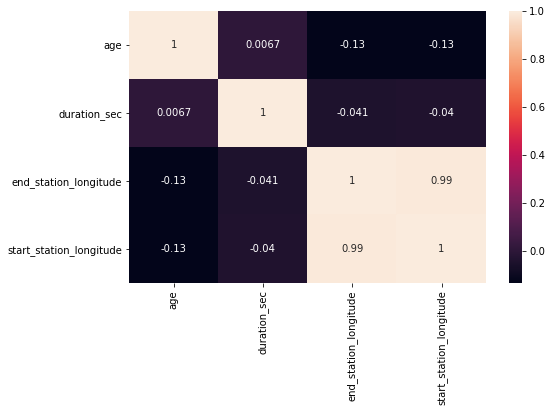

In [384]:
vars = ["age","duration_sec","end_station_longitude","start_station_longitude"]

plt.figure(figsize = [8, 5])
sb.heatmap(df[vars].corr(), annot = True)
plt.show()

**The heatmap graph displays the correlation matrix between the variables in the dataset. One notable finding is that the start_station_longitude variable has a strong positive correlation of 0.99 with the end_station_longitude variable. This indicates that the two variables are highly related and may represent similar information.
This finding may have implications for analyses that involve both start and end station locations. For example, it may be more appropriate to use a single location variable that represents the average longitude of the start and end station, rather than including both variables in the analysis. Alternatively, the correlation may suggest that the start and end station locations are essentially interchangeable, and it may not be necessary to distinguish between them in the analysis.
Overall, understanding the correlation structure between variables can help to identify patterns in the data and guide the selection of appropriate analytical methods.**

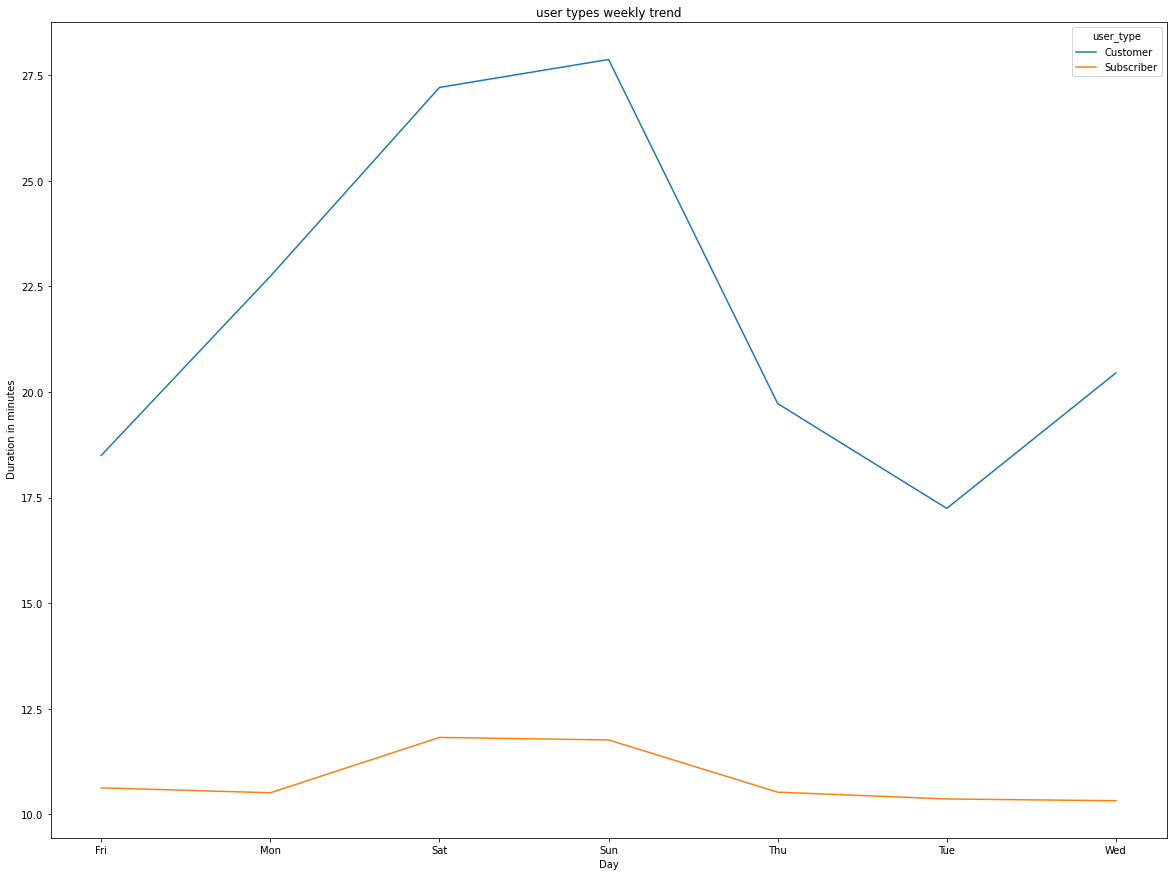

In [385]:
user_weekday_avg_mint = df.groupby(['user_type','start_weekday_abbr']).duration_min.mean()
user_weekday_avg_mint = user_weekday_avg_mint.reset_index()

plt.figure(figsize=[20,15])
sb.lineplot(data = user_weekday_avg_mint, x='start_weekday_abbr', y='duration_min', hue='user_type')
plt.xticks(np.arange(0,7))
plt.title('user types weekly trend')
plt.xlabel('Day')
plt.ylabel(' Duration in minutes');

**The multivariate line plot displays the trends in user types for each weekday with a focus on the difference in duration and user type. The plot shows that there is an overall trend of higher usage duration during the weekend for all user types**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **The plot shows that there is an overall trend of higher usage duration during the weekend for all user types**
### Were there any interesting or surprising interactions between features?

> **The heatmap graph displays the correlation matrix between the variables in the dataset. One notable finding is that the start_station_longitude variable has a strong positive correlation of 0.99 with the end_station_longitude variable**

## Conclusions
> **Based on the univariate analysis, it was found that the busiest hour for the bike-sharing system is at 5:00 PM, with approximately 20,000 trips starting during that hour. The majority of the system's members are male, with a total count of 129,252. The ages of the users range from 25 to 65 years old, with a mean age of 35.
In the bivariate analysis, it was discovered that subscribers have an average trip duration of approximately 11 minutes. The largest age group of users falls within the 26-35 age range, and the histogram of trip duration in seconds shows a positive skew, with a high peak at 600 seconds (10 minutes) and a long tail towards the right.
Finally, in the multivariate analysis, the heatmap graph displays the correlation matrix between the variables in the dataset. One notable finding is that the start_station_longitude variable has a strong positive correlation of 0.99 with the end_station_longitude variable.**